In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [3]:
df = pd.read_csv("C:/Users/simon/OneDrive/Documents/CUA COURSES/ENGR 441 & 442/Prototype 2/MASTER DATAFRAME/MASTER_system_and_weather.csv")

In [5]:
df.columns

Index(['Date', 'Generated (kWh)', 'Efficiency', 'System Name', 'Location',
       'System Size (kW)', 'Solar_Irradiance', 'Temperature_2m',
       'Cloud_Cover'],
      dtype='object')

In [9]:
X = df[['Solar_Irradiance', 'Temperature_2m', 'Cloud_Cover']]
y = df['Efficiency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [13]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

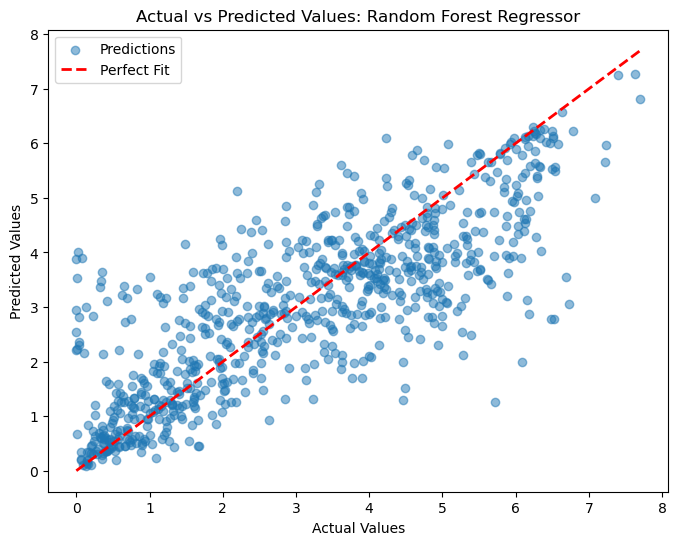

In [19]:
y_predict_rf = rf_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict_rf, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values: Random Forest Regressor")
plt.legend()
plt.show()

In [21]:
test_r2 = r2_score(y_test, y_predict_rf)
test_mae = mean_absolute_error(y_test, y_predict_rf)
test_mse = mean_squared_error(y_test, y_predict_rf)

print(f"R2 Score: {test_r2:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"MSE: {test_mse:.4f}")

R2 Score: 0.6434
MAE: 0.8296
MSE: 1.2992


In [23]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Cross Validation Scores: {cv_scores}")

Cross Validation Scores: [0.63217266 0.5957287  0.65186729 0.67822726 0.61102978]
